<b> Project Goal <b>

By considering a sample Uber Data - in which they include the pick up location (Lat, Lon, BASE), and the timing. From there we wil try to analyze the dataset to visualzie the locations into graph.

The main idea is to learn visualization.

In [1]:
# import libraries
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
# read the data
uber_data = pd.read_csv('uber-raw-data-apr14.csv')

In [3]:
print(uber_data.head(10))

          Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512
5  4/1/2014 0:33:00  40.7383 -74.0403  B02512
6  4/1/2014 0:39:00  40.7223 -73.9887  B02512
7  4/1/2014 0:45:00  40.7620 -73.9790  B02512
8  4/1/2014 0:55:00  40.7524 -73.9960  B02512
9  4/1/2014 1:01:00  40.7575 -73.9846  B02512


In [4]:
# time conversion
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'], format="%m/%d/%Y %H:%M:%S")
uber_data['DayOfWeekNum'] = uber_data['Date/Time'].dt.dayofweek
uber_data['DayOfWeek'] = uber_data['Date/Time'].dt.day_name()
uber_data['MonthDayNum'] = uber_data['Date/Time'].dt.day
uber_data['HourOfDay'] = uber_data['Date/Time'].dt.hour

In [5]:
print(uber_data.tail(10))

                 Date/Time      Lat      Lon    Base  DayOfWeekNum  DayOfWeek  \
564506 2014-04-30 23:00:00  40.7316 -73.9891  B02764             2  Wednesday   
564507 2014-04-30 23:04:00  40.7267 -73.9937  B02764             2  Wednesday   
564508 2014-04-30 23:05:00  40.7788 -73.9600  B02764             2  Wednesday   
564509 2014-04-30 23:15:00  40.7420 -74.0037  B02764             2  Wednesday   
564510 2014-04-30 23:18:00  40.7514 -74.0066  B02764             2  Wednesday   
564511 2014-04-30 23:22:00  40.7640 -73.9744  B02764             2  Wednesday   
564512 2014-04-30 23:26:00  40.7629 -73.9672  B02764             2  Wednesday   
564513 2014-04-30 23:31:00  40.7443 -73.9889  B02764             2  Wednesday   
564514 2014-04-30 23:32:00  40.6756 -73.9405  B02764             2  Wednesday   
564515 2014-04-30 23:48:00  40.6880 -73.9608  B02764             2  Wednesday   

        MonthDayNum  HourOfDay  
564506           30         23  
564507           30         23  
564508   

In [6]:
# journey by weekdays
# index নিলাম, index এর ভেলু কোন কলামের ভেলু অনুসারে কি বাড়বে
uber_weekdays = uber_data.pivot_table(index=['DayOfWeekNum','DayOfWeek'],
                                  values='Base',
                                  aggfunc='count')

In [7]:
print(uber_weekdays)

                          Base
DayOfWeekNum DayOfWeek        
0            Monday      60861
1            Tuesday     91185
2            Wednesday  108631
3            Thursday    85067
4            Friday      90303
5            Saturday    77218
6            Sunday      51251


Text(0.5, 1.0, 'Journeys by Week Day')

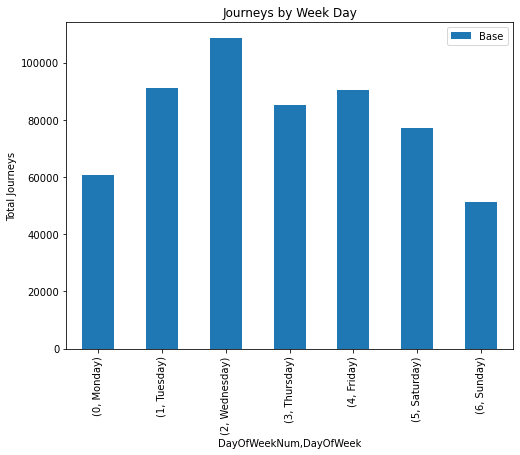

In [8]:
# plot
uber_weekdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Week Day')

Text(0.5, 1.0, 'Journeys by Month Day')

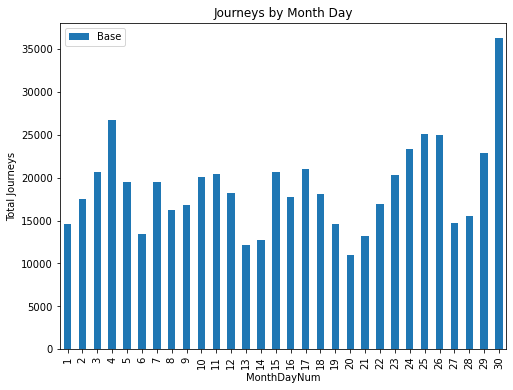

In [9]:
# journey by month
uber_monthdays = uber_data.pivot_table(index=['MonthDayNum'],
                                  values='Base',
                                  aggfunc='count')
uber_monthdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Month Day')

Text(0.5, 1.0, 'Journeys by Hour')

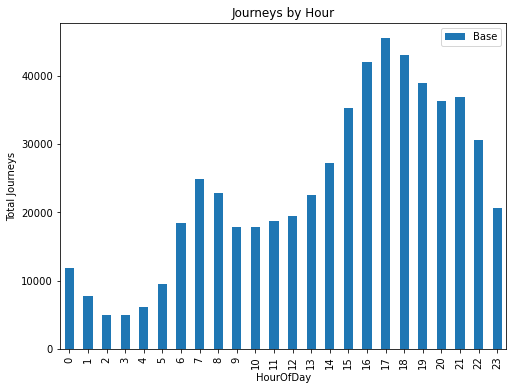

In [10]:
# journey by hour
uber_hour = uber_data.pivot_table(index=['HourOfDay'],
                                  values='Base',
                                  aggfunc='count')
uber_hour.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Hour')

In [11]:
def count_rows(rows):
    return len(rows)

#for_corssval = uber_data.groupby('DayOfWeekNum HourOfDay'.split()).apply(count_rows)
for_corssval = uber_data.groupby('DayOfWeekNum HourOfDay'.split()).apply(count_rows).unstack()
print(for_corssval)

HourOfDay       0     1     2     3     4     5     6     7     8     9   ...  \
DayOfWeekNum                                                              ...   
0              518   261   238   571  1021  1619  2974  3888  3138  2211  ...   
1              765   367   304   516   887  1734  3766  5304  4594  2962  ...   
2              899   507   371   585  1003  1990  4230  5647  5242  3846  ...   
3              792   459   342   567   861  1454  3179  4159  3616  2654  ...   
4             1367   760   513   736   932  1382  2836  3943  3648  2732  ...   
5             3027  2479  1577  1013   706   704   844  1110  1372  1764  ...   
6             4542  2936  1590  1052   685   593   669   873  1233  1770  ...   

HourOfDay       14    15    16    17    18    19    20    21    22    23  
DayOfWeekNum                                                              
0             3117  3818  4962  5574  4725  4386  3573  3079  1976  1091  
1             4489  6042  7521  8297  7089  6

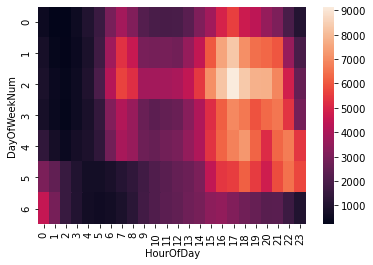

In [12]:
# plot correlation
import seaborn as sns
sns.heatmap(for_corssval)

In [13]:
# map import
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import cm

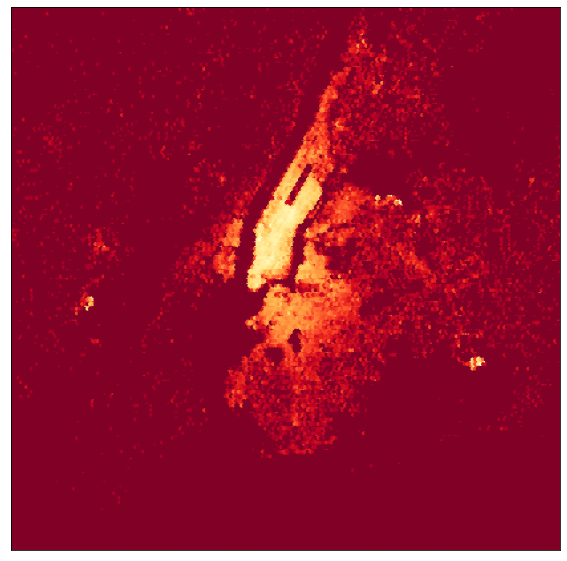

In [84]:
west, south, east, north = -74.26, 40.50, -73.70, 40.92

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='i')
x, y = m(uber_data['Lon'].values, uber_data['Lat'].values)
m.hexbin(x, y, gridsize=1000,
         bins='log', cmap=cm.YlOrRd_r);

##  Lat Lon Range Calculate - Manual Explanation

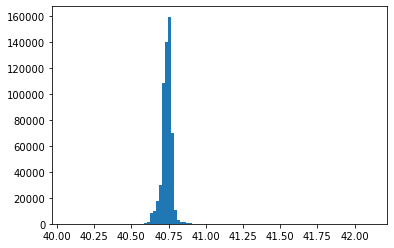

In [19]:
hist(uber_data['Lat'], bins=100); # lat = y

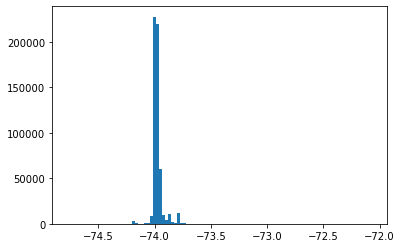

In [20]:
hist(uber_data['Lon'], bins=100);  # lon = x

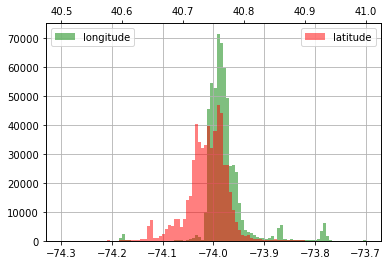

In [22]:
hist(uber_data['Lon'], bins=100, range = (-74.3, -73.7), color='g', alpha=.5, label = 'longitude')
grid()
legend(loc='upper left')
twiny()
hist(uber_data['Lat'], bins=100, range = (40.5, 41), color='r', alpha=.5, label = 'latitude')
legend(loc='best');

In [23]:
figure(figsize=(20, 20))
plot(uber_data['Lon'], data['Lat'], '.', ms=1, alpha=.5)
xlim(-74.2, -73.7)
ylim(40.5, 41)

NameError: name 'data' is not defined

<Figure size 1440x1440 with 0 Axes>

# pivot table assistance

In [16]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                         "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})

In [17]:
df

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [24]:
table = df.pivot_table(values='D', index=['A', 'B'],
                    columns=['C'], aggfunc=np.sum)

In [25]:
print(table)

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0


In [36]:
fable = df.pivot_table(index=['A', 'B'],columns=['C'],values='D',aggfunc=np.sum)

In [37]:
print(fable)

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0
